# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # indice de silueta
from yellowbrick.cluster import SilhouetteVisualizer # visualizar los indices

## Preparando datos de prueba

In [2]:
X,y,c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [ ]:
# Datos graficados en 2D
X

array([[-8.33576153e+00, -9.67839705e+00],
       [-8.05311796e+00, -9.54566828e+00],
       [ 4.17506730e+00,  7.25699190e+00],
       [ 2.30828546e+00,  8.72051930e+00],
       [ 3.94265028e+00,  6.80212770e+00],
       [-3.29209934e-01,  9.27362531e+00],
       [ 4.33353890e+00,  7.22919999e+00],
       [-3.65268943e-01, -6.09489034e-01],
       [ 1.31313307e+00,  8.65581081e+00],
       [ 3.03131011e+00,  6.74415521e+00],
       [-8.28823288e+00, -1.09381212e+01],
       [ 4.02472964e+00,  6.31890003e+00],
       [-5.55130727e-01, -1.85302585e+00],
       [ 4.68643775e+00,  7.99945162e+00],
       [ 4.37519005e+00,  7.19920238e+00],
       [ 1.35634660e-02,  1.11351593e+01],
       [ 4.93338758e+00,  7.05243486e+00],
       [ 5.24506092e+00,  5.33496645e+00],
       [-7.13007127e+00, -8.58010842e+00],
       [-8.18726810e+00, -1.04422106e+01],
       [-7.96737541e+00, -9.71048346e+00],
       [ 4.51510174e+00,  6.50365958e+00],
       [ 1.62754539e+00,  1.02445436e+01],
       [ 4.

In [ ]:
# clusters al que pertenecen los datos X
y

array([1, 1, 3, 2, 3, 2, 3, 0, 2, 3, 1, 3, 0, 3, 3, 2, 3, 3, 1, 1, 1, 3,
       2, 3, 0, 3, 2, 2, 0, 1, 3, 0, 1, 2, 0, 2, 3, 2, 3, 3, 0, 1, 0, 1,
       2, 1, 3, 3, 2, 2, 2, 3, 1, 1, 3, 3, 3, 1, 0, 3, 1, 2, 0, 1, 2, 0,
       3, 1, 2, 0, 2, 3, 2, 1, 3, 3, 0, 0, 2, 1, 2, 3, 1, 1, 0, 0, 3, 1,
       2, 3, 0, 2, 1, 0, 3, 3, 0, 0, 2, 2, 1, 0, 0, 3, 1, 1, 3, 2, 1, 0,
       0, 2, 0, 3, 0, 3, 3, 3, 1, 0, 0, 0, 3, 2, 2, 1, 0, 0, 2, 2, 3, 0,
       3, 0, 0, 1, 2, 0, 0, 1, 0, 3, 2, 3, 3, 1, 1, 1, 3, 2, 2, 2, 1, 3,
       3, 2, 2, 1, 1, 2, 1, 2, 3, 0, 3, 0, 0, 2, 3, 0, 2, 3, 0, 1, 2, 1,
       0, 1, 0, 2, 1, 1, 3, 1, 2, 1, 3, 0, 0, 1, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 1, 1, 3, 0, 3, 1, 3, 2, 1, 3, 2, 1, 1, 1, 2, 2, 2, 3, 3, 2,
       3, 3, 0, 1, 2, 3, 0, 0, 3, 3, 3, 0, 2, 0, 0, 0, 0, 2, 3, 1, 2, 1,
       2, 3, 0, 1, 3, 2, 1, 2, 0, 0, 3, 1, 1, 3, 1, 2, 2, 1, 2, 0, 1, 1,
       0, 2, 2, 1, 1, 2, 3, 1, 2, 2, 3, 3, 0, 1, 3, 0, 0, 1, 3, 3, 0, 0,
       1, 1, 3, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2,

In [ ]:
# Ubicacion de los 4 centroides
c

array([[-0.50958399, -1.10106372],
       [-8.05005039, -9.56456971],
       [ 0.49379992,  9.13048782],
       [ 4.53526423,  6.50447181]])

In [ ]:
# formato de dataframe a los datos 
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

df_blobs


,x1,x2,y
0,-8.335762,-9.678397,1
1,-8.053118,-9.545668,1
2,4.175067,7.256992,3
3,2.308285,8.720519,2
4,3.942650,6.802128,3
...,...,...,...
495,-7.587431,-10.948878,1
496,-8.827763,-9.228369,1
497,-7.085172,-10.033105,1
498,5.548694,4.515167,3


In [9]:
# formato de dataframe de los centroides
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

df_centers

,x1,x2
0,-0.509584,-1.101064
1,-8.050050,-9.564570
2,0.493800,9.130488
3,4.535264,6.504472


## Visualización de datos

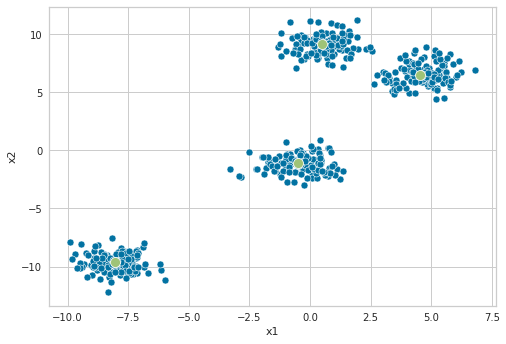

In [11]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', markers='x', s=100)
plt.show()

## Aplicando K-means

Vamos a aplicar el modelo k-means probando incialmente con 3 clusteres

In [ ]:
# definimos el modelo ML
kmeans = KMeans(n_clusters=3)

# entrenamos el modelo con X y asignamos una etiqueta de cluster a cada X
df_cluster = kmeans.fit_predict(X)

# agregar las etiquetas de cluster al df original
df_blobs['cluster'] = df_cluster

# obtener las coordenadas de los centroides
k_means_centers = kmeans.cluster_centers_

# crear un df con las coordenadas de los centroides
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
    }
)

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


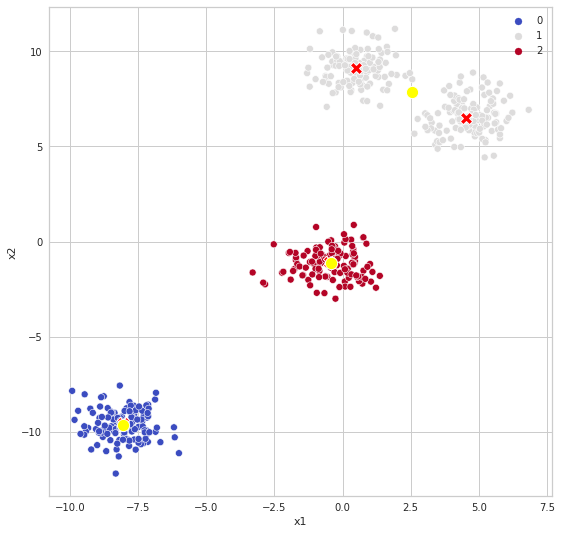

In [16]:
# graicamos los clusteres
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='red')
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='yellow')
plt.show()


> Los centroides amarillos son los predichos por el modelo que al elegir 3, nos muestra los tres centroides.

> Los centroides rojos, son los dados en los datos y estan ubicados en cada cluster.

In [17]:
# Funcion que grafica los clusteres para dierentes K
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


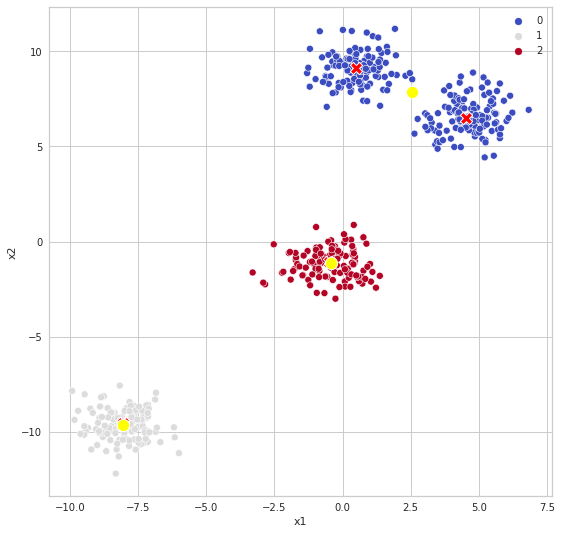

4


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


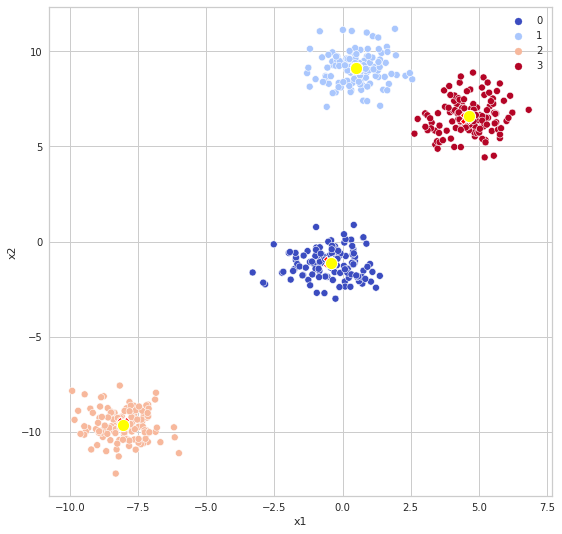

5


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


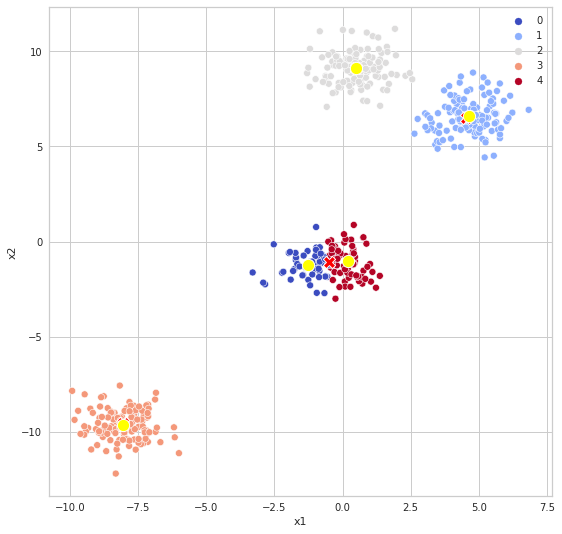

6


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


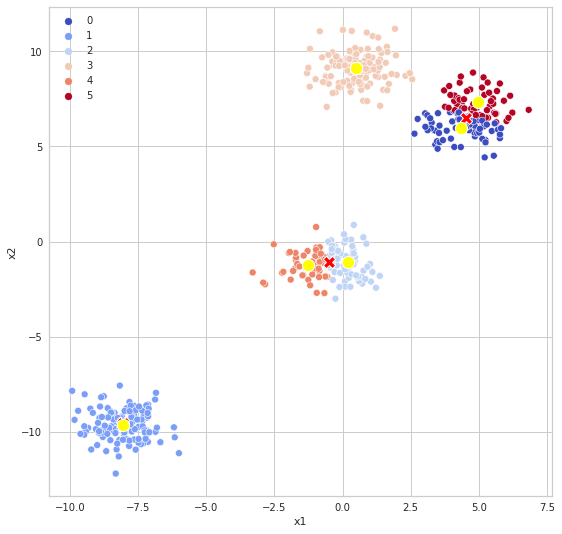

In [ ]:
# visualizamos los clusters con 3 hasta 6 K
for _ in range(3,7):
    print(_)
    vis_cluster(_)

> En cada caso podemos ver como el modelo se ajusta a la cantidad de cluster a predecir llegando a dividir los cluster erroneamente si se le pide un K demasiado alto.

> Para conjuntos de datos pequenos y de baja dimensionalidad este enfoque es efectivo. Sin embargo, en otros casos resulta complicado. En tales casos se utiliza el metodo del codo. 

## Encontrando el valor de K

Vamos a utilizar el metodo del codo para encontrar el K optimo. Es util para conjuntos de datos grandes y con alta dimensionalidad.  

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

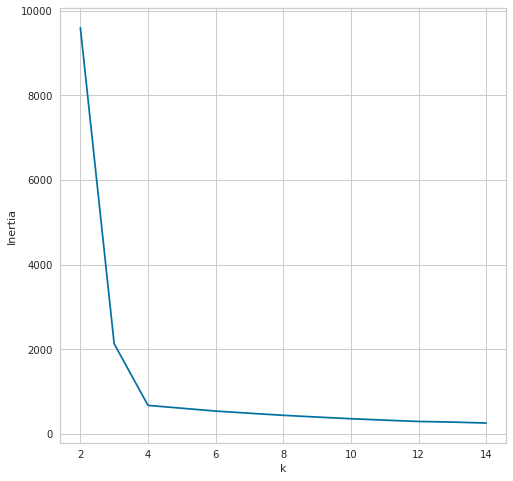

In [19]:
# lista que alamacena las distancias WCSS
sum_of_squared_distances = []

# definimos el rango de valores de K
K = range(2,15)

# entrenamos el modelo para los distintos K
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

# Creamos la grafica del codo
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


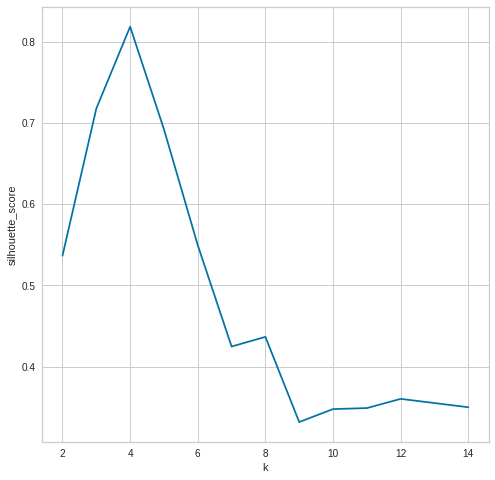

In [ ]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

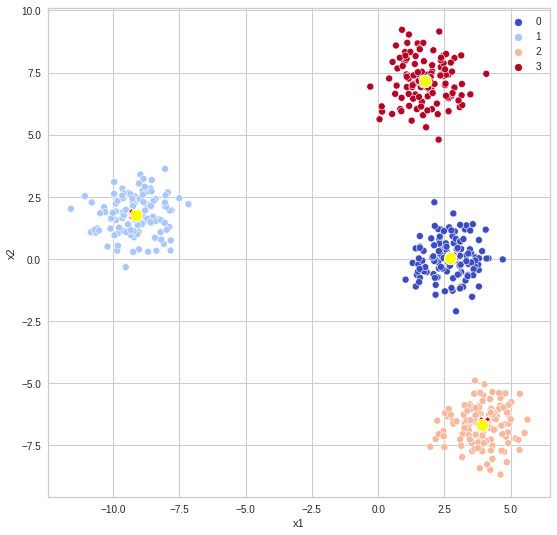

In [ ]:
vis_cluster(4)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c2e9a85d0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

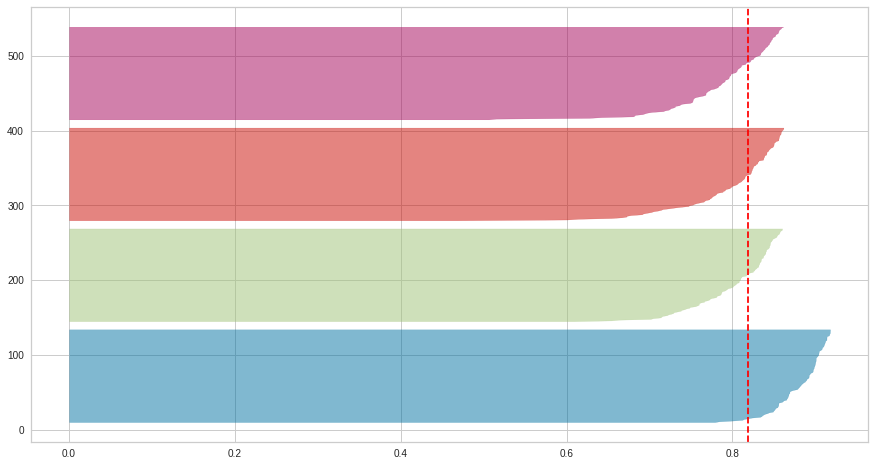

In [ ]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)